In [ ]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import time
import os
from tqdm import tqdm

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터셋이 위치한 경로
# 여러분들이 다운로드 받은 데이터셋의 경로를 찍어주시면 됩니다.
data_dir = '/content/drive/MyDrive/Parrot DL Project'

In [ ]:
# 이미지 변환
# 이리저리 바꿔보면서 좋은 성능이 나오도록 하시면 됩니다.
# 다만 validation은 건들지 말아주세요
data_transforms = {
    'train': transforms.Compose([ # 원본 이미지 그대로
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
# 여기는 건들지 말아주세요!

# 이미지 데이터셋 불러오기
full_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                          data_transforms['train'])

# 클래스명
class_names = full_dataset.classes

In [ ]:
len(class_names), class_names[:10]

(200,
 ['001.Black_footed_Albatross',
  '002.Laysan_Albatross',
  '003.Sooty_Albatross',
  '004.Groove_billed_Ani',
  '005.Crested_Auklet',
  '006.Least_Auklet',
  '007.Parakeet_Auklet',
  '008.Rhinoceros_Auklet',
  '009.Brewer_Blackbird',
  '010.Red_winged_Blackbird'])

In [ ]:
type(full_dataset), len(full_dataset) # 전체 데이터는 10597개

(torchvision.datasets.folder.ImageFolder, 10597)

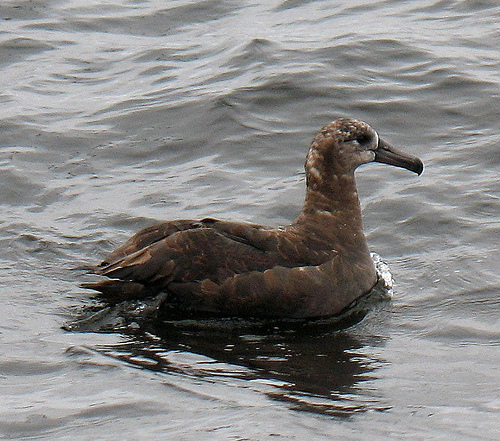

In [ ]:
from PIL import Image
# 예제 이미지 1개 출력
file_path = data_dir + '/train/' + class_names[0]
file_names = os.listdir(file_path)
file_name = file_names[0]
origin_image_path = file_path + '/' + file_name
image = Image.open(origin_image_path)
image

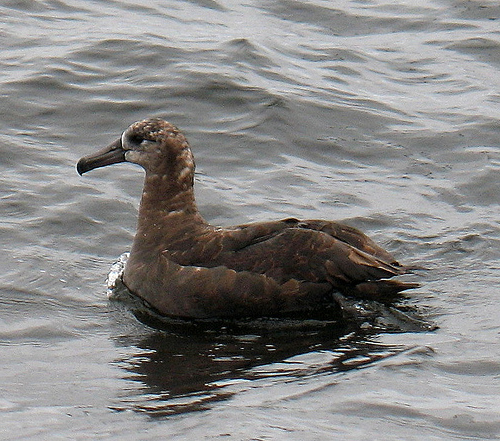

In [ ]:
# Flip 예제
inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
inverted_image

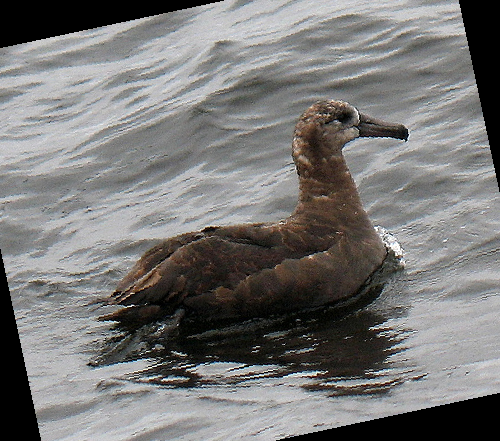

In [ ]:
import random
# rotate 예제
rotated_image = image.rotate(random.randrange(-20, 20))
rotated_image

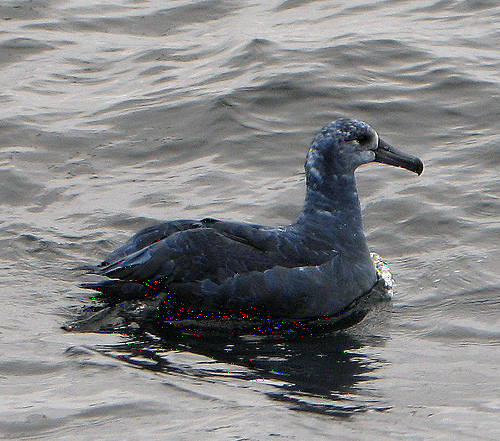

In [ ]:
import cv2
import numpy as np
# 노이즈 추가 예제
img = cv2.imread(origin_image_path)
row,col,ch= img.shape
mean = 0
var = 1
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
noisy_array = img + gauss
noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
noisy_image

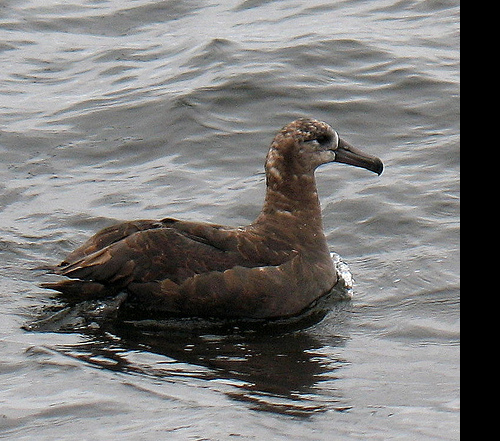

In [ ]:
# 이미지 shift 예제
import random
shift = random.randint(-50, 50)
transform_matrix = (1, 0, shift, 0, 1, 0)
shifted_image = image.transform(image.size, Image.AFFINE, transform_matrix)
shifted_image

In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps

total_augmented = 0

for i in range(200):
  file_path = data_dir + '/train/' + class_names[i] # 각 클래스별 폴더 경로 지정
  file_names = os.listdir(file_path) # 각 클래스별 폴더 내의 파일들의 이름
  total_origin_image_num = len(file_names)
  augment_cnt = 0

  num_augmented_images = int(total_origin_image_num / 2) # 새로 만들 이미지 갯수
  for i in range(num_augmented_images):
    #change_picture_index = random.randrange(1, total_origin_image_num-1) # 파일들 중 하나를 선택하기 위한 인덱스 랜덤 선택
    change_picture_index = i
    file_name = file_names[change_picture_index] # 해당 인덱스로 실제 파일 선택

    origin_image_path = file_path + '/' + file_name # 해당 파일의 경로를 설정
    image = Image.open(origin_image_path) # 이미지로 불러오기

    # 어떤 변환을 줄지 선택
    random_augment = random.randrange(1,4)
    if(random_augment == 1):
        #이미지 좌우 반전
        inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        inverted_image.save(file_path + '/' + 'inverted_' + str(augment_cnt) + '.png')
    elif(random_augment == 2):
        #이미지 기울이기
        rotated_image = image.rotate(random.randrange(-20, 20))
        rotated_image.save(file_path + '/' + 'rotated_' + str(augment_cnt) + '.png')
    elif(random_augment == 3):
      shift = random.randint(-50, 50)
      transform_matrix = (1, 0, shift, 0, 1, 0)
      shifted_image = image.transform(image.size, Image.AFFINE, transform_matrix)
      shifted_image.save(file_path + '/' + 'shifted_' + str(augment_cnt) + '.png')
    augment_cnt += 1
  total_augmented += augment_cnt
print(total_augmented)

5277


27분 소요

In [ ]:
# 이미지 데이터셋 불러오기
full_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'),
                                          data_transforms['train'])

# 클래스명
class_names = full_dataset.classes

In [ ]:
len(class_names), class_names[:10] # 클래스의 개수는 동일하게 유지

(200,
 ['001.Black_footed_Albatross',
  '002.Laysan_Albatross',
  '003.Sooty_Albatross',
  '004.Groove_billed_Ani',
  '005.Crested_Auklet',
  '006.Least_Auklet',
  '007.Parakeet_Auklet',
  '008.Rhinoceros_Auklet',
  '009.Brewer_Blackbird',
  '010.Red_winged_Blackbird'])

In [ ]:
type(full_dataset), len(full_dataset) # 전체 데이터가 10597개에서 15874개로 50% 증가

(torchvision.datasets.folder.ImageFolder, 15874)